Seaborn Exercises

Using 'Iris' Database

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, username, password, get_db_url

In [3]:
url = get_db_url('iris_db')

In [4]:
pd.read_sql('SHOW TABLES', url)

,Tables_in_iris_db
0,measurements
1,species


In [5]:
iris_measurements = pd.read_sql('''SELECT * FROM measurements''', url)
iris_measurements

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [6]:
iris_species = pd.read_sql('''SELECT * FROM species''', url)
iris_species

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


PROBLEM 1: What does the distribution of petal lengths look like?

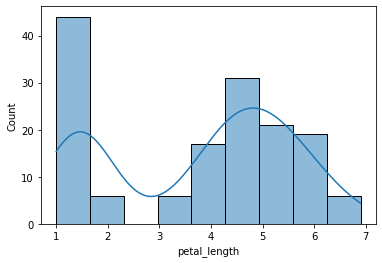

In [7]:
sns.histplot(iris_measurements.petal_length, kde=True)
plt.show()

PROBLEM 2: Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

In [8]:
iris_len_wid = iris_measurements[['petal_length','petal_width']]
iris_len_wid

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
len_wid_corr = iris_len_wid.corr(method='pearson')
len_wid_corr

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


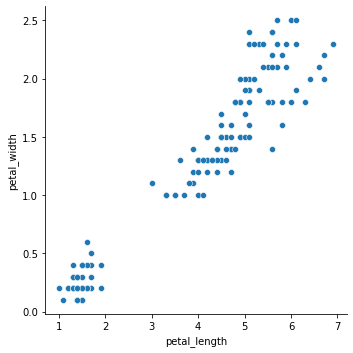

In [10]:
sns.relplot(x='petal_length',y='petal_width',data=iris_len_wid)

They do seem to be corrilated.

PROBLEM 3: Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

In [47]:
iris_meas_spec = iris_measurements.merge(iris_species, how = 'inner',on= 'species_id')
iris_meas_spec

# Combining datasets for ease of processing

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='species_name'>

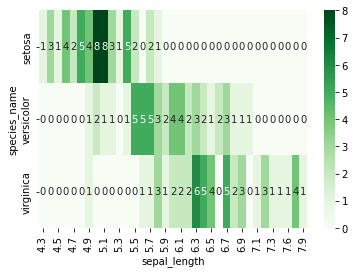

In [12]:
spec_sepal_len = pd.crosstab(iris_meas_spec.species_name, iris_meas_spec['sepal_length'])
sns.heatmap(spec_sepal_len, annot=True, cmap=plt.cm.Greens)

# Exploring a heatmap of species by length. Data seems a bit squished. Setosa seems to stand 
# out for length. The other two seem to be slightly different but a bit closer in measurement.

<AxesSubplot:xlabel='sepal_width', ylabel='species_name'>

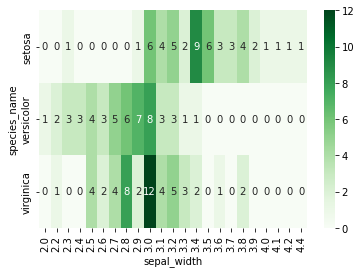

In [13]:
spec_sepal_len = pd.crosstab(iris_meas_spec.species_name, iris_meas_spec['sepal_width'])
sns.heatmap(spec_sepal_len, annot=True, cmap=plt.cm.Greens)

# Same as above for the width of each species. Setosa stands out again while the other two are closer in range.

In [14]:
spec_sepal = iris_meas_spec [['sepal_length','sepal_width','species_name']]
spec_sepal.head()

# Stripping down the dataset so I can create bins to try the heat map again.

,sepal_length,sepal_width,species_name
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [15]:
spec_sepal['sepal_length'] = pd.cut(spec_sepal['sepal_length'], 20)

# Creating bins for a new heatmap

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_1978/2033963545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_sepal['sepal_length'] = pd.cut(spec_sepal['sepal_length'], 20)


In [16]:
spec_sepal['sepal_width'] = pd.cut(spec_sepal['sepal_width'], 20)

# Same as above. Just creating bins for width.

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_1978/1647826322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_sepal['sepal_width'] = pd.cut(spec_sepal['sepal_width'], 20)


<AxesSubplot:xlabel='sepal_length', ylabel='species_name'>

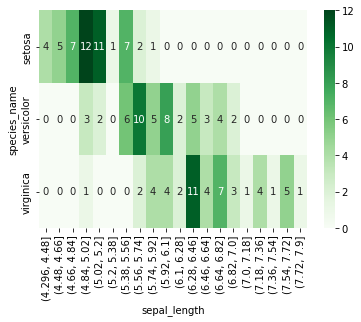

In [17]:
spec_sepal_len_2 = pd.crosstab(spec_sepal.species_name, spec_sepal['sepal_length'])
sns.heatmap(spec_sepal_len_2, annot=True, cmap=plt.cm.Greens)

# Checking out my new dataframe with bins. Setosa stands out again. The other two seem to be seperate but still
# cover a lot of the same range.

<AxesSubplot:xlabel='sepal_width', ylabel='species_name'>

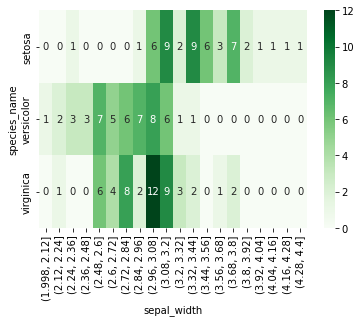

In [18]:
spec_sepal_len_2 = pd.crosstab(spec_sepal.species_name, spec_sepal['sepal_width'])
sns.heatmap(spec_sepal_len_2, annot=True, cmap=plt.cm.Greens)

# Width is still murky. Setosa stands out the most.

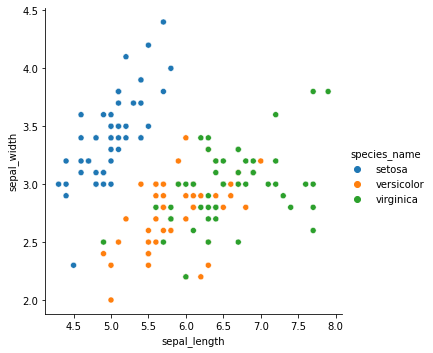

In [19]:
sns.relplot(x = 'sepal_length', y = 'sepal_width', hue = 'species_name', data = iris_meas_spec)

# Attempting a different approuch. Setosa stands out the most.

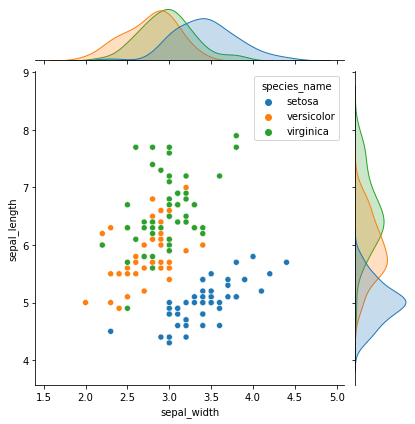

In [20]:
sns.jointplot(data= iris_meas_spec, x = 'sepal_width', y = 'sepal_length', hue = 'species_name')

# The visualization here tells a good story of the data. Setosa stands out as longer and more narrow.
# Versicolor seems to be in the middle of the other two as far as height but has a similar width to virginica.

Looking at a few visualizations setosa seems to be the only one you could really tell through just sepal width and length.

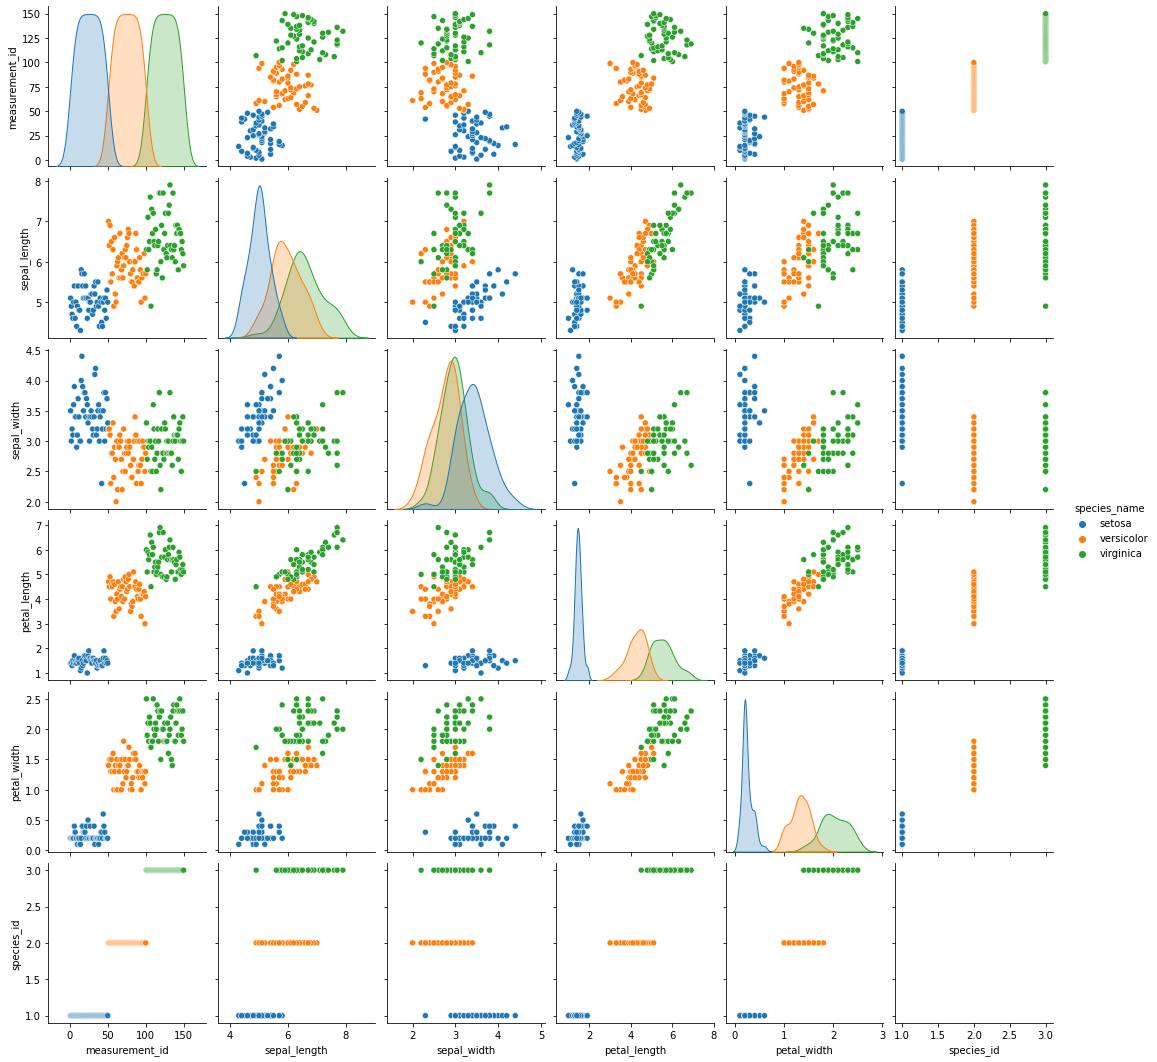

In [21]:
sns.pairplot(iris_meas_spec, hue = 'species_name')

PROBLEM 4: Which features would be best used to predict species?

In [22]:
iris_meas_spec.head()

# I would say species name and species_id would be a good place to start for a feature that could be used to predict 
# species but I will explore further....

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


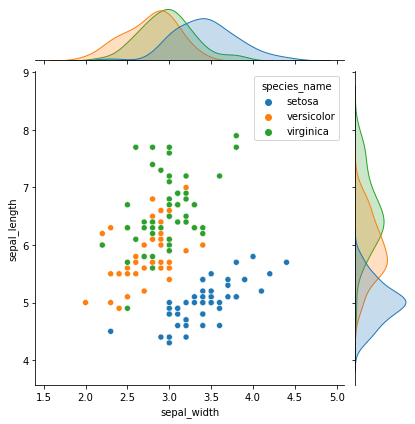

In [23]:
sns.jointplot(data= iris_meas_spec, x = 'sepal_width', y = 'sepal_length', hue = 'species_name')

# I liked the jointplot approach so i will try that with other variations

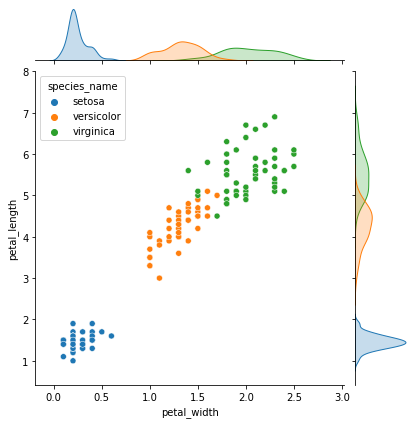

In [24]:
sns.jointplot(data= iris_meas_spec, x = 'petal_width', y = 'petal_length', hue = 'species_name')

# Petal width and length seems to be a good option for determining the species.

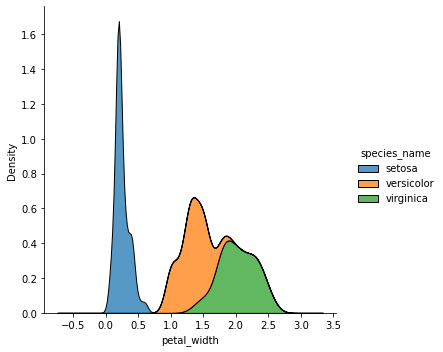

In [25]:
sns.displot(data = iris_meas_spec, x = 'petal_width', hue = 'species_name', multiple = 'stack', kind = 'kde')

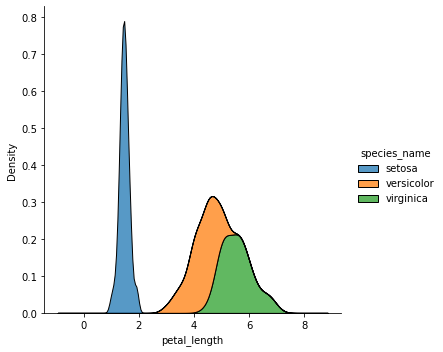

In [26]:
sns.displot(data = iris_meas_spec, x = 'petal_length', hue = 'species_name', multiple = 'stack', kind = 'kde')

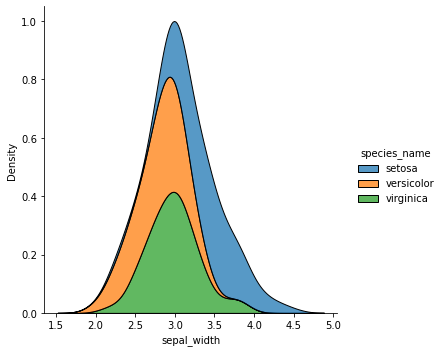

In [27]:
sns.displot(data = iris_meas_spec, x = 'sepal_width', hue = 'species_name', multiple = 'stack', kind = 'kde')

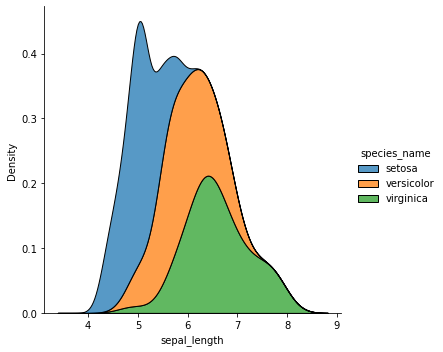

In [28]:
sns.displot(data = iris_meas_spec, x = 'sepal_length', hue = 'species_name', multiple = 'stack', kind = 'kde')

In [29]:
# Digging into each specific variable petal measurements seem to be the best way to tell. Setosa stands out the most. 

In [30]:
iris_meas_spec.corr()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
measurement_id,1.000000,0.716676,-0.402301,0.882637,0.900027,0.942830
sepal_length,0.716676,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.882637,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.900027,0.817941,-0.366126,0.962865,1.000000,0.956547
species_id,0.942830,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

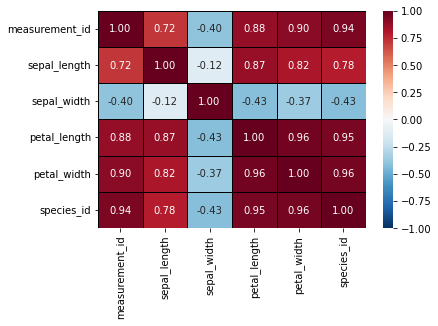

In [31]:
sns.heatmap(iris_meas_spec.corr(),
            cmap = 'RdBu_r',
           vmax = 1,
           vmin = -1,
           center = 0,
           linewidth = 1,
           linecolor = 'k',
           annot = True,
           fmt = '.2f'
           )

In [32]:
# Using a heatmap of the corrilation looks promising. I realize that I need to breakdown each species into specific dataframes to see if corrilation works.

In [33]:
setosa = iris_meas_spec [iris_meas_spec['species_name'] == 'setosa']
setosa = setosa.drop(columns=['species_name','measurement_id', 'species_id'])
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

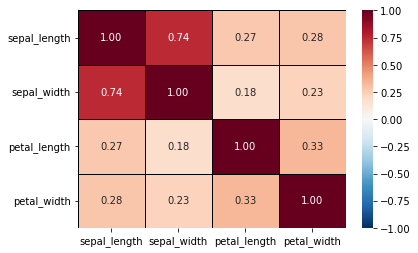

In [34]:
sns.heatmap(setosa.corr(),
            cmap = 'RdBu_r',
           vmax = 1,
           vmin = -1,
           center = 0,
           linewidth = 1,
           linecolor = 'k',
           annot = True,
           fmt = '.2f'
           )

In [35]:
virginica = iris_meas_spec [iris_meas_spec['species_name'] == 'virginica']
virginica = virginica.drop(columns=['species_name','measurement_id', 'species_id'])
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2


<AxesSubplot:>

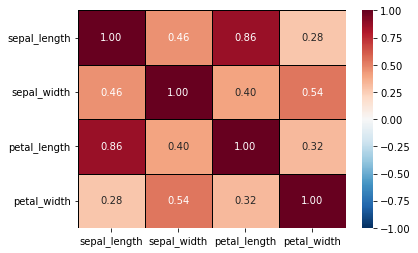

In [36]:
sns.heatmap(virginica.corr(),
            cmap = 'RdBu_r',
           vmax = 1,
           vmin = -1,
           center = 0,
           linewidth = 1,
           linecolor = 'k',
           annot = True,
           fmt = '.2f'
           )

In [45]:
versicolor = iris_meas_spec [iris_meas_spec['species_name'] == 'versicolor']
versicolor = versicolor.drop(columns=['species_name','measurement_id', 'species_id'])
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


<AxesSubplot:>

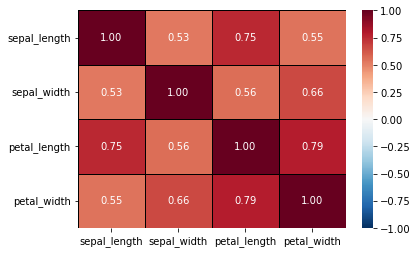

In [38]:
sns.heatmap(versicolor.corr(),
            cmap = 'RdBu_r',
           vmax = 1,
           vmin = -1,
           center = 0,
           linewidth = 1,
           linecolor = 'k',
           annot = True,
           fmt = '.2f'
           )

Looking at the above data I feel like the jointplot and displot gave me the clearest picture. I realize I may be looking at the correlations
in the wrong way at first. It is interesting to look at them as a whole but that doesn't differentiate the species. Looking at the individual species
they seem to have different proporties that relate. Setosa sepal width and length seem to be highly corrilated. Virginica seems to have correlation between
petal length and sepal length. Versicolor seems to have correlation between petal width and length. This doesn't neccessarily show how they are different
from each. Going back to the start I feel that petal width and length show the clearest picture especially when put into a jointplot with hue = species_name.

PROBLEM SET 2

PROBLEM 1: Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [78]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [79]:
anscombe.groupby('dataset').describe()
# 

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

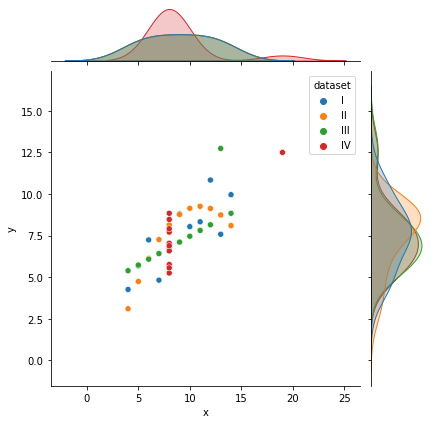

In [80]:
sns.jointplot(data = anscombe, x = 'x', y = 'y', hue = 'dataset')

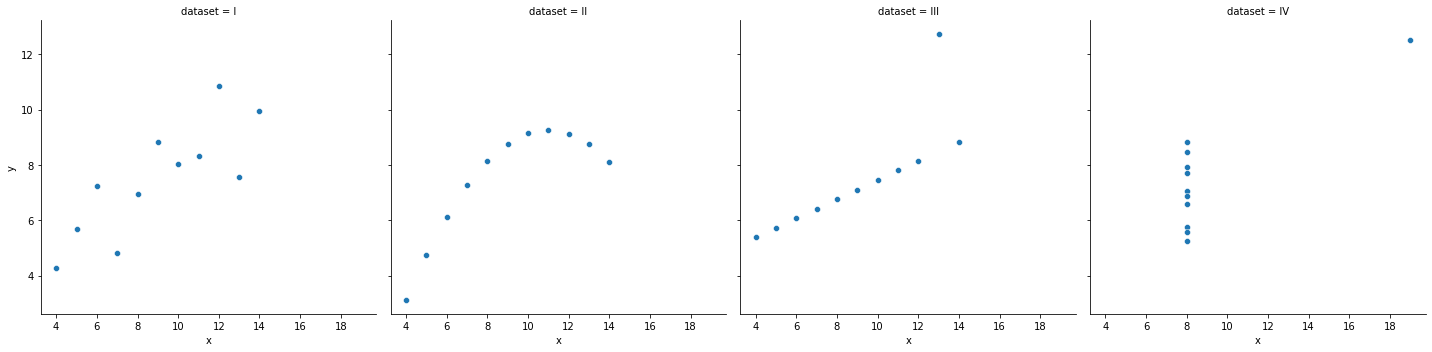

In [81]:
sns.relplot(x='x', y='y', col='dataset',data=anscombe)

# Below problems were done after the deadline and I did work through class examples. Just wanted to go through the motions. #

PROBLEM # 2: Load the InsectSprays dataset and read it's documentaiton. Create a boxplot that shows the effectiveness of the different insect sprays. 

In [82]:
from pydataset import data
insectspray = data('InsectSprays')
insectspray.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [83]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<AxesSubplot:xlabel='spray', ylabel='count'>

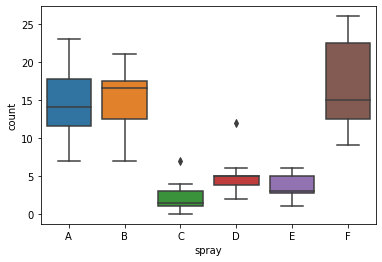

In [89]:
sns.boxplot(data = insectspray, x = "spray", y = "count")

PROBLEM 3: Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [85]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


A) Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
(Choose a cutoff point for what constitutes catholic)

In [86]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


B) Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

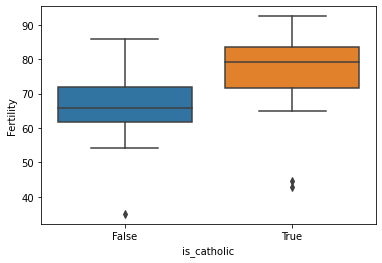

In [91]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

It does look like the fertility measure is higher in the Catholic population.

C) What measure correlates most strongly with fertility?

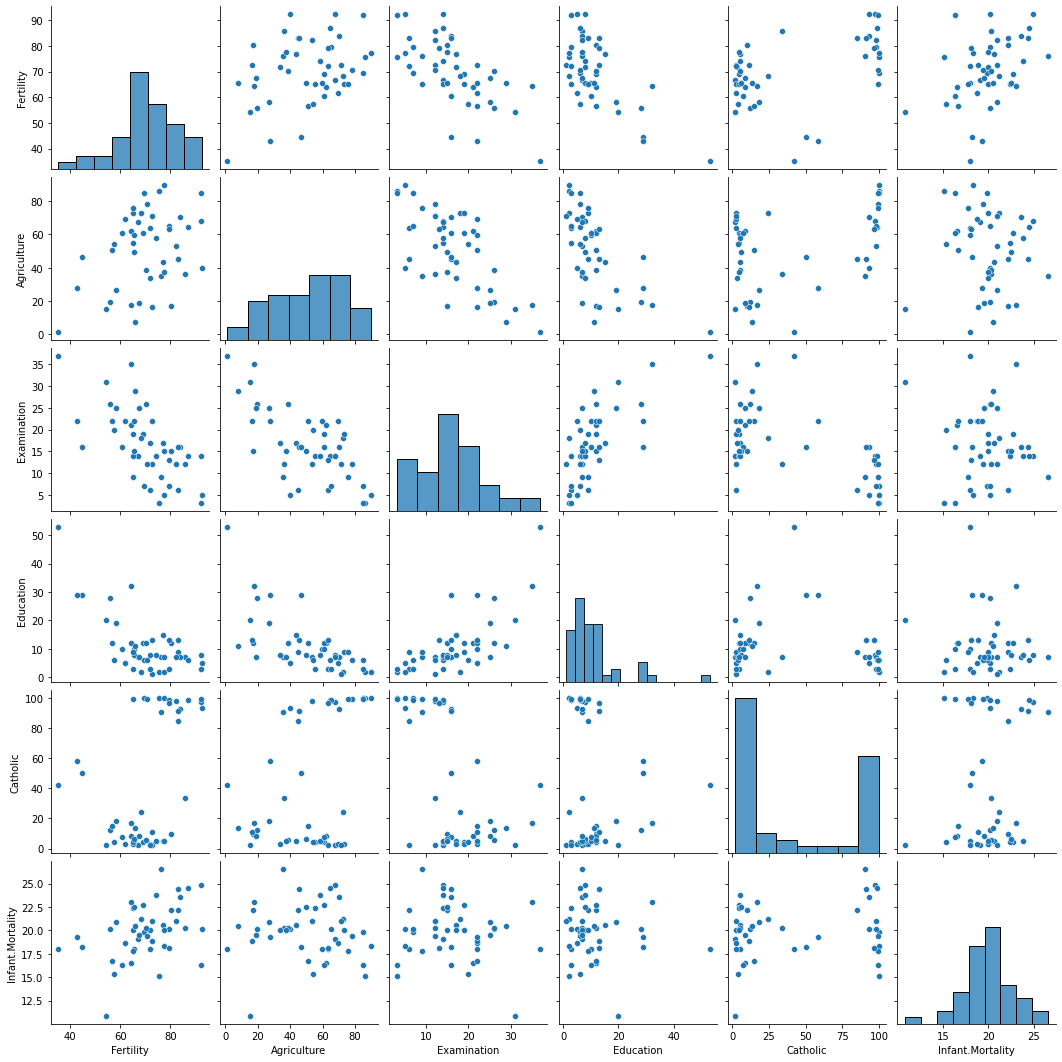

In [93]:
sns.pairplot(data = swiss.iloc[:,:-1])

In [94]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

It looks like examination and education have a strong negative corrilation with fertility.

PROBLEM 4: Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [95]:
url= get_db_url('chipotle')

In [106]:
orders = pd.read_sql('SELECT * FROM orders', url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [107]:
orders['item_price'] = orders.item_price.str.replace('$','',regex = True).astype('float')
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [114]:
top = orders.groupby('item_name').quantity.sum().nlargest(4)
top

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [117]:
top.index
revenue = orders[orders.item_name.isin(top.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [118]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


<AxesSubplot:xlabel='item_price', ylabel='item_name'>

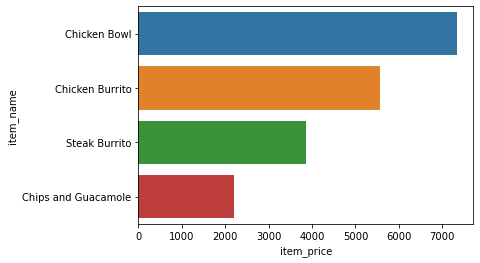

In [120]:
sns.barplot(x = 'item_price', y = 'item_name', data = revenue)

PROBLEM 5: Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [121]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

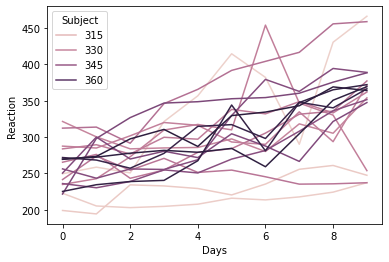

In [123]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject',legend = False)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

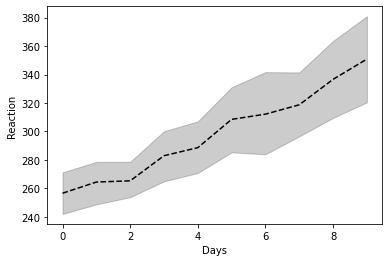

In [128]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean')

Text(0, 265, 'Average')

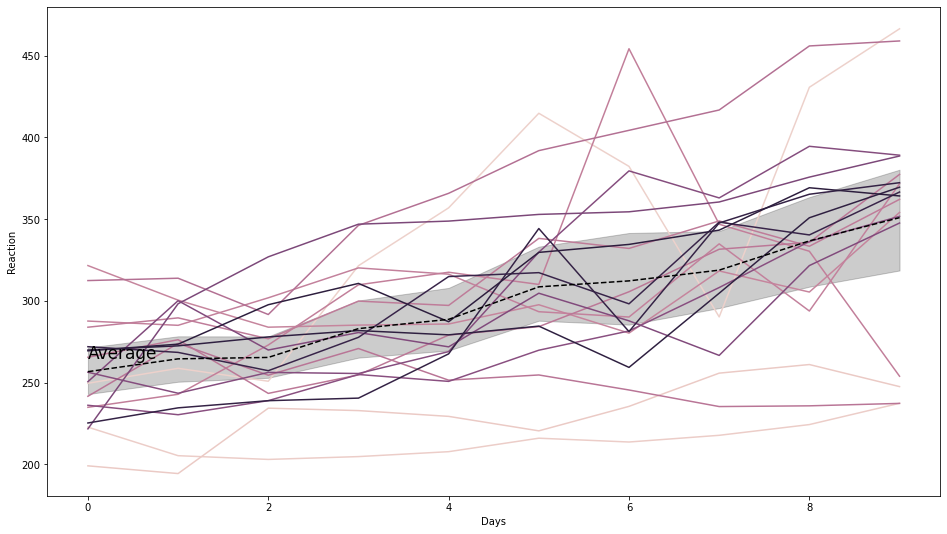

In [130]:
plt.figure(figsize=(16,9))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject',legend = False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean')
plt.annotate('Average',(0,265),fontsize=17)
